In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import xgboost as xgb
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../../datasets/wine_reviews/prepared/prepared_winemag-data-130k-v2.csv')
df = df.reindex(columns=['country', 'province', 'variety', 'winery', 'region_1', 'price', 'points'])
display(df)
display(df.info())

,country,province,variety,winery,region_1,price,points
0,40,266,317,10688,1171,0.064935,3.5
1,40,216,346,11804,523,0.058442,3.5
2,40,266,321,11982,1171,0.396104,3.5
3,37,260,429,12051,719,0.071429,3.5
4,22,328,130,12313,1158,0.077922,3.5
...,...,...,...,...,...,...,...
100342,15,11,317,5156,21,0.155844,5.0
100343,40,266,321,4041,749,0.461039,5.0
100344,15,11,148,5009,21,0.168831,5.0
100345,15,11,317,5092,21,0.181818,5.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100347 entries, 0 to 100346
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   country   100347 non-null  int64  
 1   province  100347 non-null  int64  
 2   variety   100347 non-null  int64  
 3   winery    100347 non-null  int64  
 4   region_1  100347 non-null  int64  
 5   price     100347 non-null  float64
 6   points    100347 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 5.4 MB


None

In [3]:
X = df.iloc[:, :-1].values
y = df['points'].values
display(X)
display(y)

array([[4.00000000e+01, 2.66000000e+02, 3.17000000e+02, 1.06880000e+04,
        1.17100000e+03, 6.49350649e-02],
       [4.00000000e+01, 2.16000000e+02, 3.46000000e+02, 1.18040000e+04,
        5.23000000e+02, 5.84415584e-02],
       [4.00000000e+01, 2.66000000e+02, 3.21000000e+02, 1.19820000e+04,
        1.17100000e+03, 3.96103896e-01],
       ...,
       [1.50000000e+01, 1.10000000e+01, 1.48000000e+02, 5.00900000e+03,
        2.10000000e+01, 1.68831169e-01],
       [1.50000000e+01, 1.10000000e+01, 3.17000000e+02, 5.09200000e+03,
        2.10000000e+01, 1.81818182e-01],
       [1.50000000e+01, 1.10000000e+01, 1.48000000e+02, 5.19700000e+03,
        2.10000000e+01, 1.10389610e-01]])

array([3.5, 3.5, 3.5, ..., 5. , 5. , 5. ])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestRegressor

In [5]:
random_forest_regressor = RandomForestRegressor()
parameters = {
    'max_depth': [10, 20, 100],
    'n_estimators': [100, 200, 500],
    'min_samples_leaf': [1, 3, 5, 10],
    'max_features': [1, 5, 'sqrt'],
}

In [6]:
grid_search = GridSearchCV(
    estimator=random_forest_regressor,
    param_grid=parameters,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=3,
    n_jobs=-1,
)

In [7]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 100],
                         'max_features': [1, 5, 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='neg_mean_squared_error', verbose=3)

In [8]:
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor score (MSE):", -grid_search.best_score_)

Melhores parâmetros: {'max_depth': 20, 'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 500}
Melhor score (MSE): 1.2197937749233525


In [9]:
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE no conjunto de teste:", mse)

MSE no conjunto de teste: 1.18368835518615


In [10]:
y_pred = best_model.predict(X_test)

In [11]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Erro Quadrático Médio (MSE):", mse)
print("Erro Absoluto Médio (MAE):", mae)

Erro Quadrático Médio (MSE): 1.18368835518615
Erro Absoluto Médio (MAE): 0.8509781241756802


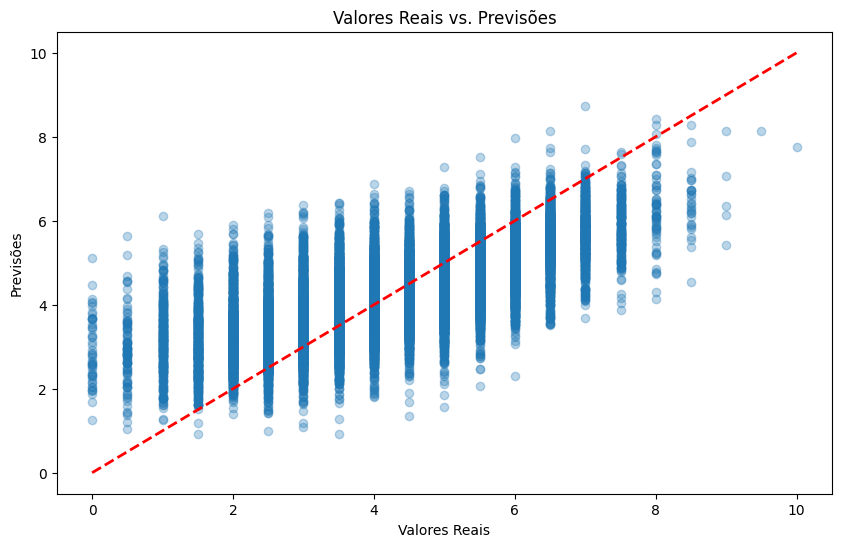

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Valores Reais vs. Previsões')
plt.show()

# XGBRegressor

In [13]:
xgb_model = XGBRegressor()
parameters = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9]
}

In [14]:
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=parameters,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1)

In [15]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 9],
                         'subsample': [0.7, 0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [16]:
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor score (MSE):", -grid_search.best_score_)

Melhores parâmetros: {'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 9, 'subsample': 0.9}
Melhor score (MSE): 1.2081740094210527


In [17]:
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE no conjunto de teste:", mse)

MSE no conjunto de teste: 1.195224658094075


In [18]:
y_pred = best_model.predict(X_test)

In [19]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Erro Quadrático Médio (MSE):", mse)
print("Erro Absoluto Médio (MAE):", mae)

Erro Quadrático Médio (MSE): 1.195224658094075
Erro Absoluto Médio (MAE): 0.8616875615473939


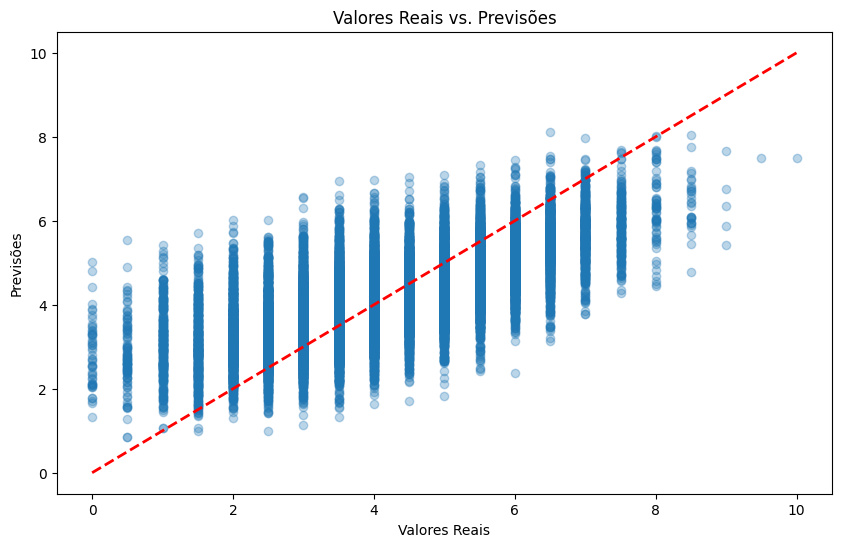

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Valores Reais vs. Previsões')
plt.show()